<b><font size='3'>Plot a graph between 'K' and 'Sum of Distances of all the points of a cluster from their respective centroids'</font></b>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/soham/Downloads/clustering.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
7,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
8,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
9,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y


In [2]:
def k_total_distance(data, cx, cy, i_centroid, cluster_colname):
    # Calculate Euclidean distance for each data point assigned to centroid 
    distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x, y) in  data.loc[data[cluster_colname] == i_centroid, data.columns != cluster_colname].values.tolist()]
    # return the sum value
    return np.sum(distances)

In [3]:
from sklearn.cluster import KMeans
distances={}
for k in range(1,11):
    X = df.loc[:,["LoanAmount","ApplicantIncome"]]
    k_means=KMeans(n_clusters=k, random_state=5).fit(X)
    X["Cluster"]=k_means.labels_
    centroids = k_means.cluster_centers_
    total_distance = []
    for i, (cx, cy) in enumerate(centroids): # enumerate selects indexes of a list/array along with the elements at those indexes 
        tot_distance = k_total_distance(X, cx, cy, i, "Cluster")
        total_distance.append(tot_distance)
    distances[k]=np.sum(total_distance)
    
distances

{1: 407191.41309939674,
 2: 259651.61686873366,
 3: 188962.42849695045,
 4: 141945.0982117455,
 5: 122582.06490461549,
 6: 101554.61302768867,
 7: 93795.73951590875,
 8: 77955.91794400496,
 9: 70481.80130315179,
 10: 61681.15940148477}

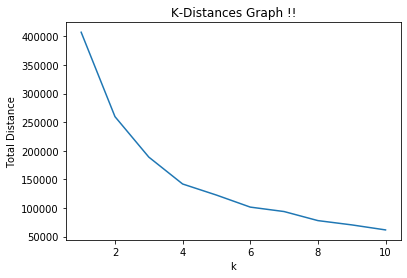

In [4]:
# x axis values 
x = list(distances.keys())
# corresponding y axis values 
y = list(distances.values())

# plotting the points 
plt.plot(x, y) 

# naming the x axis 
plt.xlabel('k') 
# naming the y axis 
plt.ylabel('Total Distance') 

# giving a title to my graph 
plt.title('K-Distances Graph !!') 

# function to show the plot 
plt.show() 

<b><font size='6'>Using "kmeans.inertia_" attribute for doing the same thing :- </font></b>

In [5]:
from sklearn.cluster import KMeans
distances_inertia={}
for k in range(1,11):
    X = df.loc[:,["LoanAmount","ApplicantIncome"]]
    k_means=KMeans(n_clusters=k, random_state=5).fit(X)
    distances_inertia[k]=k_means.inertia_
    
distances_inertia

{1: 766336682.7979002,
 2: 291148680.62682676,
 3: 151285948.9451614,
 4: 93203913.66283888,
 5: 65237579.379314095,
 6: 47146700.20088731,
 7: 36582671.886742145,
 8: 26692868.763658524,
 9: 19438843.552139413,
 10: 15059280.052783208}

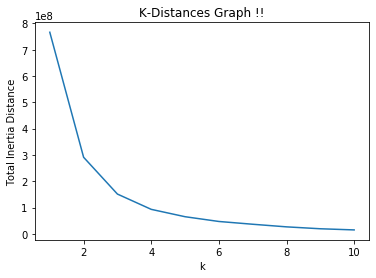

In [6]:
# x axis values 
x = list(distances_inertia.keys())
# corresponding y axis values 
y = list(distances_inertia.values())

# plotting the points 
plt.plot(x, y) 

# naming the x axis 
plt.xlabel('k') 
# naming the y axis 
plt.ylabel('Total Inertia Distance') 

# giving a title to my graph 
plt.title('K-Distances Graph !!') 

# function to show the plot 
plt.show() 